# Homework 07: The Normal Distribution, The Central Limit Theorem, Confidence Intervals
***

**Name**: Mohamad Saaty

***

This assignment is due on Canvas by **6:00PM on Friday October 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

For this HW you will want to import a few of the usuals:

In [2]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1
***
We are going to look at some data from an insurance company that insures teenage drivers. `insurance.csv` is a sample of 1000 males and 1000 females all of whose ages are between 16 and 19 inclusive.

This insurance company has decided to use 'sex' as a proxy for deciding how large of a premium to charge for car insurance.

Read in the csv file `insurance.csv`.

### Part A
***(1 point)*** Load the `csv` file into a dataframe and call it `dfInsurance`:

In [3]:
# Read 'insurance' into dfInsurance
dfInsurance = pd.read_csv("insurance.csv")

### Part B
***(1 point)*** Take a look at the data.

In [4]:
# Take a look at the data here:
dfInsurance

,Sex,miles driven,Age,Citations
0,F,4200.826390,18,0
1,F,5468.727014,17,0
2,F,5282.253745,18,0
3,F,5060.526521,17,0
4,F,5101.878224,16,2
...,...,...,...,...
1995,M,8433.768080,17,1
1996,M,8047.929523,18,1
1997,M,7285.647012,18,1
1998,M,8579.702457,18,0


### Data Description:

This data contains records from a number of teenage drivers. The drivers were observed for 12 months and the number of miles they drove and the number of citations they received were recorded. Citations were for wreckless driving, disobeying traffic laws, speeding, and/or accidents.

$\color{red}{\text{Sex}}$ - This is the sex of the driver.

$\color{red}{\text{miles driven}}$ - This is the number of miles driven during the observation period.

$\color{red}{\text{Age}}$ - This is the age of the driver at the beginning of the observation period.

$\color{red}{\text{Citations}}$ - This is the number of citations received by the driver.


### Part C
***(2 points)*** Which sex has more overall citations?

In [5]:
# Code here to print your answer:
if (dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].sum() > 
dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].sum()):
    
    print("males have more overall citations: ",
          dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].sum())
else:
    print("females have more overall citations: ",
          dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].sum())

males have more overall citations:  468


### Part D
***(2 points)*** Find the mean number of citations received by males and the mean number of citations received by females. Who received more citations in the year?


In [6]:
#Code your answer here:
if (dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].mean() >
dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].mean()):
    
    print("males have more overall citations: ",
          dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].mean())
else:
    print("females have more overall citations: ",
          dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].mean())

males have more overall citations:  0.468


### Part E
***(3 points)*** Estimate the difference in population means (for citations received) by creating a 95% CI for the difference between the sample means for number of citations received by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

In [7]:
# Code your answer here:
sm = (dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].std()/
dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].count())
sn = (dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].std()/
dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].count())
root = (sm+sn)**.5
x = dfInsurance['Citations'].loc[dfInsurance['Sex']=="M"].mean()
y = dfInsurance['Citations'].loc[dfInsurance['Sex']=="F"].mean()
diff = x-y
z = stats.norm.ppf(1-.05/2)
print(diff,"+/-",z*root)
print("interval is ", (diff-z*root,diff+z*root))

0.07100000000000001 +/- 0.07728467033630902
interval is  (-0.0062846703363090145, 0.14828467033630904)


### Part F
***(1 point)*** Is 0 inside the confidence interval? Describe the meaning of your results.


Solution here:
it is. the interval include negative numbers in the lower limit and positive numbers in the upper limit; hence, 0 is included. That is mostly because the difference between the two means is small.

### Part G
***(4 points)*** Compare the number of miles driven per year by each sex. Start by getting a visual representation of the number of miles driven by each sex. Graph both male and female 'miles driven' distributions in the same frame for comparison.


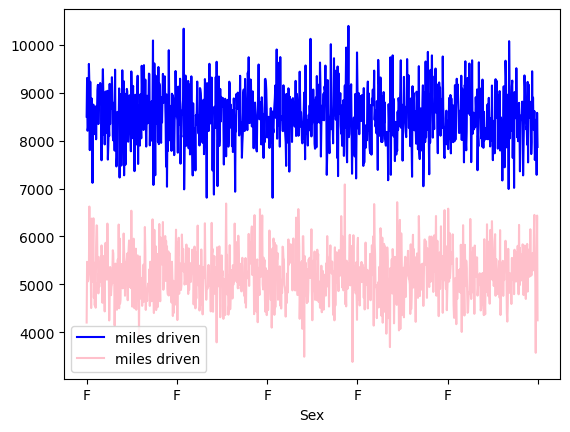

In [8]:
# Code your answer here:
ax = plt.gca() 
dfInsurance.loc[dfInsurance['Sex']=="M"].plot(x='Sex',y='miles driven',color = 'blue',ax=ax)
dfInsurance.loc[dfInsurance['Sex']=="F"].plot(x='Sex',y='miles driven',color ='pink',ax=ax)
plt.show()

### Part H
***(1 point)*** Based on the distributions, who appears to drive more miles in a year? Is there any overlap of histograms? Describe what you have found.

Solution: 
There is no overlap; males drive more miles in a year.

### Part I
***(2 points)*** What is the difference in mean miles driven by the two groups (male and female)?

In [9]:
# Code solution here:
print(dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].mean() -
dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].mean())

3291.516906011987


### Part J
***(3 points)*** Estimate the difference in population means (for miles driven) by creating a 95% CI for the difference between the sample means for 'miles driven' by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.

In [10]:
# Code solution here:
sm = (dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].std()/
dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].count())
sn = (dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].std()/
dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].count())
root = (sm+sn)**.5
x = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].mean()
y = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].mean()
diff = x-y
z = stats.norm.ppf(1-.05/2)
print(diff,"+/-",z*root)
print("interval is ",(diff-z*root,diff+z*root))

3291.516906011987 +/- 2.04802975193546
interval is  (3289.4688762600517, 3293.564935763922)


### Part K
***(1 points)*** Is 0 in the interval? Describe your findings.

Solution:
No, the difference between the two means is big. Hence, the interval does not include 0.

### Part L
***(4 points)*** Create a column called 'CPM'(this acronym stands for citations per 1000 miles), and put in it the number of citations divided by the number of miles driven (multiplied by 1000). The multiplication by 1000 ensures we are looking at citations per 1000 miles. This is done because the numbers are so small.

After you create the 'CPM' column look at the tail of the dataframe.

In [11]:
# Code your solution here:
# for index, item in enumerate(items):
cit = [c for c in dfInsurance['Citations']]
cpm =[]
for i,m in enumerate(dfInsurance['miles driven']):
    cpm.append(cit[i]/m*100)
dfInsurance.insert(4,'CPM',cpm,True)
dfInsurance.tail()


,Sex,miles driven,Age,Citations,CPM
1995,M,8433.768080,17,1,0.011857
1996,M,8047.929523,18,1,0.012426
1997,M,7285.647012,18,1,0.013726
1998,M,8579.702457,18,0,0.000000
1999,M,7868.067827,16,0,0.000000


### Part M
***(2 points)*** Look at the difference in means for male CPM and female CPM. Which sex receive more citations per 1000 miles?

In [12]:
# Code solution here:
mcpm_mean = dfInsurance['CPM'].loc[dfInsurance["Sex"]=="M"].mean()
fcpm_mean= dfInsurance['CPM'].loc[dfInsurance['Sex']=="F"].mean()
print ("males have more citations per 1000 miles") if mcpm_mean-fcpm_mean>0 else print("",
"females have more citations per 1000 miles")

 females have more citations per 1000 miles


### Part N
***(1 point)*** You should have discovered that females get more citations per mile than do males. How does this go together with the fact that males get more citations in a year?

Solution:
Citations per year different than citations per 100 miles since males drive more miles per year. Choosing just 100 miles would make the more miles males have per year than females indifferent. 

### Part O
***(3 points)*** Estimate the difference in population means (for CPM's) by creating a 95% CI for the difference between the sample means for 'CPM' for males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.


In [13]:
# Code solution here:

z = norm.ppf(1-.05/2)
s1 = dfInsurance['CPM'].loc[dfInsurance["Sex"]=="M"].std()
s2 = dfInsurance['CPM'].loc[dfInsurance['Sex']=="F"].std()
m =len(dfInsurance['CPM'].loc[dfInsurance['Sex']=="M"])
n =len(dfInsurance['CPM'].loc[dfInsurance['Sex']=="F"])
root = ((s1**2)/m + (s2**2)/n)**.5
lower = mcpm_mean-fcpm_mean - z*root
upper = mcpm_mean-fcpm_mean + z*root
(lower,upper)

(-0.003248914054212023, -0.0010832224801218477)

### Part S
***(5 points)*** What percent of males drive between 6400 and 8400 miles per year?
What percent of females drive that same amount?


In [15]:
# Code your solution here:

mmilesmean = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].mean()
mmilesstd = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="M"].std()
fmilesmean = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].mean()
fmilesstd = dfInsurance['miles driven'].loc[dfInsurance['Sex']=="F"].std()
mzlow = (6400-mmilesmean)/(mmilesstd)
fzlow = (6400-fmilesmean)/(fmilesstd)
mzhigh = (8400-mmilesmean)/(mmilesstd)
fzhigh = (8400-fmilesmean)/(fmilesstd)
pmales = norm.cdf(mzhigh)-norm.cdf(mzlow)
pfemales = norm.cdf(fzhigh)-norm.cdf(fzlow)
print(pmales*100, "% of males drive between 6400 and 8400 miles per year")
print(pfemales*100, "% females drive the same amount")

42.49542712643046 % of males drive between 6400 and 8400 miles per year
1.1412627182770474 % females drive the same amount


### Part T
***(4 points)*** 95% of females drive less than x miles. What is x?

In [16]:
# Code your solution here:
#z= x-m / std
#x = std*z + m
z = norm.ppf(.95)

x = fmilesstd*z + fmilesmean
print("x is ",x)

x is  6071.695308657169


# Problem 2
***

Let $X$ be a normal random variable, $X \sim N(\mu, \sigma^2) = N(5,9)$.

Let $Z$ be a $\color{red}{\text{standard}}$ normal random variable, $Z \sim N(\mu, \sigma^2) = N(0,1)$.


### Part A

***(2 points)*** Compute $P(X \leq 8.75)$.

In [17]:
# Code your solution here:
stats.norm.cdf(8.75,5,3)

0.8943502263331446

### Part B

***(2 points)*** Compute $P(Z\leq 1.25)$.

In [18]:
# Code your solution here:
stats.norm.cdf(1.25,0,1)

0.8943502263331446

### Part C

***(2 points)*** Explain why the answer to these first two questions are the same.

Solution:
The values of Z is just the normalized values of X, which means the distribution of the probabilites is the same.

In [21]:
z = stats.norm.ppf(1-.01)
print(1-stats.norm.cdf(z))

0.010000000000000009
